In [667]:
!pip install qiskit

  Found existing installation: sympy 1.0
Cannot uninstall 'sympy'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


**What is Qiskit?**

Qiskit (Quantum Information Science Kit) is an open source software development kit (SDK) for Python. It allows the user to work with OpenQASM and the IBM Q quantum processors.

**Running a Quantum Circuit on Qiskit**

Using some of Qiskit's built in functions, quantum circuits can be compiled and run. The foundation of Qiskit, the Terra element, provides the necessary functions to construct these basic quantum circuits. 

**Example**: running a basic quantum circuit and analysing the results.


In [668]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

Once the necessary packages have been imported, a quantum register can be created. In Qiskit, a quantum register is a system of qubits.




In [669]:
q = QuantumRegister(1) 

c = ClassicalRegister(1)

qc = QuantumCircuit(q,c)

A classical register is a collection of classical bits in which information can be stored once each qubit has been measured. 

The parameter for both of these functions is the number of qubits and classical bits that are required for the circuit. In this quantum circuit, there is a single qubit and a single classical bit.

The QuantumCircuit will be used to add gates to the circuit. 


To perform an operation on the qubit, a gate must be added to the circuit.

Acting a Pauli-X gate on the qubit yields:
$$ X |0\rangle = |1\rangle $$
$$ X |1\rangle = |0\rangle $$

The Pauli-X gate is also known as the NOT-gate.  


In [670]:
qc.x(q[0])
qc.barrier(q)
qc.measure(q,c)

The constructed circuit can be visualized using draw().

In [671]:
qc.draw()

To run this quantum circuit, a *backend* is needed. A *backend* represents either a simulator or a real quantum computer. It is responsible for running quantum circuits and returning results. In this tutorial, the quantum circuits will be run only on the simulator. 

To access the backends, a *provider* is used. The Aer provider is used to access several simulators that run on the user's local device. 

To run the circuit above, we will use the Aer provider to access the OpenQASM backend. 


In [672]:
from qiskit import BasicAer

In [673]:
backend = BasicAer.get_backend('qasm_simulator')

The OpenQASM backend simulates the circuit as if it were being run on a real quantum computer where the measurements are performed in the computational basis.

After a qubit is measured, its information becomes a classical bit. The measurement  takes either the value 0 if the qubit is measured in the $|0\rangle$ state
, or the value 1 if the qubit is measured in the $|1\rangle$ state. 

In a given run of a quantum circuit with *n* qubits, the result will be one of the $2^{n}$ possible n-bit binary strings.

If the experiment is run a second time, the outcome may be different, due to the fundamental randomness of quantum physics.

The OpenQASM backend runs the quantum circuit many times and returns the ocurrence of each possible outcome.

In [674]:
job = execute(qc, backend, shots=1024)
res = job.result()
res.get_counts()

{'1': 1024}

The *execute()* function runs the quantum circuit. The parameters that need to be specified are the name of the circuit, the backend used and the shots (the number of times the circuit is run). 

The *result()* function returns the Result object which allows access to the results of an execution of the quantum circuit.

Using the Result object, the *get_counts*() function can be used to return the number of times the qubit was measured in each state (in this single qubit system, the possible states are $|1\rangle$ or $|0\rangle$).

Each of the 1024 measurements of this circuit returned the  $|1\rangle$ state. 

**Example:** constructing a simple quantum circuit such that measurement of the qubit yeilds, roughly, the result 0 for half of the measurements and 1 for the other half of the measurements.

**Plotting the Results**

Once the number of times that each outcome ocurred has been obtained, the probability of each outcome ocurring can be determined. This can be done by dividing the number of times that each outcome occured using the total number of shots. 

Qiskit provides the *plot_histogram*() function that calculates these probabilites and plots the results on a histogram. 


In [675]:
from qiskit.tools.visualization import plot_histogram


**The State Vector Simulator**

Instead of using the OpenQasm backend, the statevector_simulator can also be used. This backend can be used to obtain the quantum state of the qubit (or system of qubits) as a complex vector of dimension  $2^{n}$, where *n* is the number of qubits. 

If $|\psi \rangle$ is an arbitrary state, then:

$$|\psi \rangle = a |0\rangle+ b|1\rangle $$

Expressed as a vector: 
$$|\psi\rangle=\begin{pmatrix}
 a\\
 b\\
 \end{pmatrix}$$
where $a$ and $b$ are complex numbers.

$|a|^{2}$ is the probability of measuring the $|0\rangle$ state and $|b|^{2}$ is the probability of measuring the $|1\rangle$ state.
 $$ |a|^{2} + |b|^{2} = 1 $$ 

 
 
 

In [676]:
q = QuantumRegister(1) 
qc = QuantumCircuit(q)

**NOTE**: when using the state_vector simulator, it is not necessary to create a classical register. 

The following quantum circuit creates the $|-\rangle$ state : 

$$ |-\rangle = \frac{|0\rangle - |1\rangle  }{\sqrt{2}} $$
$$= \begin{pmatrix}
0.707\\
-0.707
\end{pmatrix}$$







In [677]:
qc.x(q[0])
qc.h(q[0])


In [678]:
qc.draw()

In [679]:
backend = BasicAer.get_backend('statevector_simulator')

In [680]:
job = execute(qc,backend)
res = job.result()

In [681]:
vector = res.get_statevector(qc,decimals=3)
print(vector)

[ 0.707+0.j -0.707+0.j]


**NOTE**: Each component is a complex number. In Python, the imaginary unit is represented by* j*. 

This vector can be printed in a more readable form using sympy. 

In [682]:
from sympy import Matrix , pprint

In [683]:
pprint(Matrix(vector))

⎡0.707 ⎤
⎢      ⎥
⎣-0.707⎦


$|0.707|^{2}$ = $ \frac{1}{2}$ is the probability of measuring the qubit to be in the $|0\rangle$ state and $|-0.707|^{2}$ = $ \frac{1}{2}$ is the probability of measuring the qubit to be in the $|1\rangle$ state. 

**The Bloch Sphere**

Another way to visualize the action of quantum gates on single qubits is using the Bloch Sphere. Any quantum state can be represented as:

$$ |\psi\rangle = \cos(\frac{\theta}{2}) |0\rangle + e^{i\phi}\sin(\frac{\theta}{2}) |1\rangle$$ 

Each state is represented by a point on a 3-dimensional unit sphere. The vector from the origin to this point is known as the Bloch Vector and is parametrized by $\theta$ and $\phi$.  






**Example**: plotting the $|0\rangle$ state



In [684]:
from qiskit.tools.visualization import plot_bloch_vector


In [685]:
qc1 = QuantumCircuit(q)


In [686]:
qc1.iden(q[0])

In [687]:
job = execute(qc1,backend)
res =job.result()

In [688]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[1.+0.j 0.+0.j]


To plot a Bloch Vector in Qiskit, the quantum state must be represented as a density matrix, $\rho$:

$$ \rho = |\psi\rangle \langle\psi| $$ where $|\psi\rangle$ is a state vector. 




In [689]:
p = np.outer(vector,vector.conj())

Then, the x, y and z components of the Bloch Vector are given by: 

$$ x = \mathrm{tr}(X \rho) $$ 
$$ y = \mathrm{tr}(Y \rho) $$ 
$$ z = \mathrm{tr}(Z \rho) $$ 

In [690]:
px = np.array([[0,1],[1,0]])
py = np.array([[0,-1j],[1j,0]])
pz = np.array([[1,0],[0,-1]])


In [691]:
x = float(np.trace(np.dot(px,p)))
y = float(np.trace(np.dot(py,p)))
z = float(np.trace(np.dot(pz,p)))

/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [692]:
vec=[x,y,z]

Using the x, y and z components, the Bloch Vector can be plotted. 

Since only the Identity Gate has been acted on the qubit, this Bloch Vector represents the $|0\rangle$ state. 

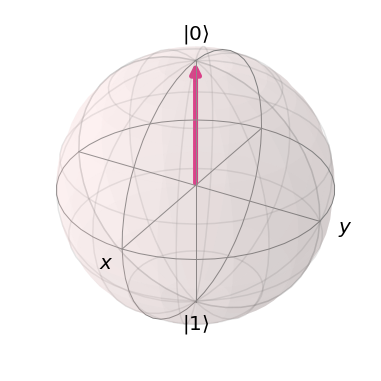

In [693]:
plot_bloch_vector(vec)

**Example**: using the same procedure, the action of the X Gate on a qubit in the  $|0\rangle$ state can be demonstrated. 

In [694]:
qc1 = QuantumCircuit(q)


In [695]:
qc1.x(q[0])

In [696]:
job = execute(qc1,backend)
res = job.result()

In [697]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[0.+0.j 1.+0.j]


In [698]:
p = np.outer(vector,vector.conj())

In [699]:
x = float(np.trace(np.dot(px,p)))
y = float(np.trace(np.dot(py,p)))
z = float(np.trace(np.dot(pz,p)))

/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [700]:
vec = [x,y,z]

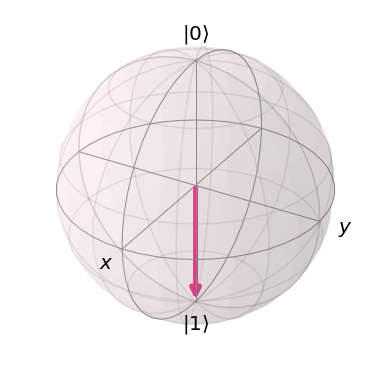

In [701]:
plot_bloch_vector(vec)

The X Gate induced a $\pi$ rotation around x. 

**Example**: demonstrating the action of the Hadamard Gate on a qubit in the $|0\rangle$ state. 



In [702]:
qc1 = QuantumCircuit(q)

In [703]:
qc1.h(q[0])

In [704]:
job = execute(qc1,backend)
res = job.result()

In [705]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[0.707+0.j 0.707+0.j]


In [706]:
p = np.outer(vector,vector.conj())

In [707]:
x = float(np.trace(np.dot(px,p)))
y = float(np.trace(np.dot(py,p)))
z = float(np.trace(np.dot(pz,p)))

/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [708]:
vec = [x,y,z]

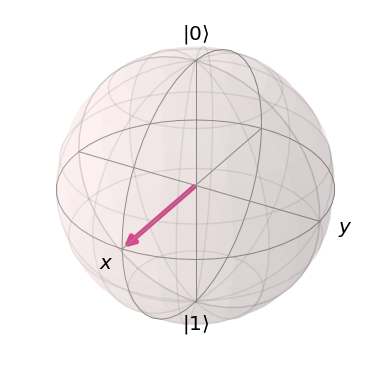

In [709]:
plot_bloch_vector(vec)

The Hadamard Gate induces a $\frac{\pi}{2}$ rotation around y and a $\pi$ rotation around x. 

**Example 4**: demonstrating the action of the Y Gate on the qubit in the $|+\rangle$ state

$$ |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$
$$= \begin{pmatrix}
0.707\\
0.707
\end{pmatrix}$$

In [710]:
qc1 = QuantumCircuit(q)

In [711]:
qc1.h(q[0])
qc1.y(q[0])

In [712]:
job = execute(qc1,backend)
res = job.result()

In [713]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[0.-0.707j 0.+0.707j]


In [714]:
p = np.outer(vector,vector.conj())

In [715]:
x = float(np.trace(np.dot(px,p)))
y = float(np.trace(np.dot(py,p)))
z = float(np.trace(np.dot(pz,p)))

/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [716]:
vec = [x,y,z]

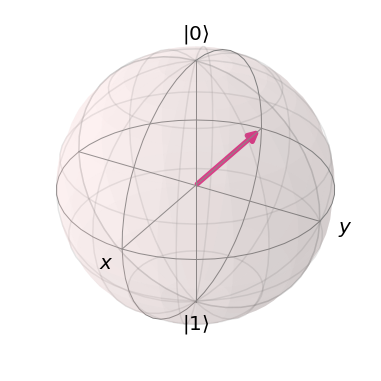

In [717]:
plot_bloch_vector(vec)

The Y Gate induces a $\pi$ rotation around y. 

**Example**: demonstrating the action of the Z Gate on the qubit in the $|+\rangle$ state. 

In [718]:
qc1=QuantumCircuit(q)

In [719]:
qc1.h(q[0])
qc1.z(q[0])

In [720]:
job=execute(qc1,backend)
res=job.result()

In [721]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[ 0.707+0.j -0.707+0.j]


In [722]:
p=np.outer(vector,vector.conj())

In [723]:
x=float(np.trace(np.dot(px,p)))
y=float(np.trace(np.dot(py,p)))
z=float(np.trace(np.dot(pz,p)))

/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [724]:
vec=[x,y,z]

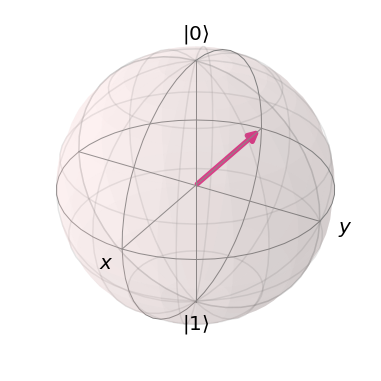

In [725]:
plot_bloch_vector(vec)

The Z Gate induces a $\pi$ rotation around z. 

**Example**: demonstrating the action of the T Gate on the qubit in the $|+\rangle$ state. 

In [726]:
qc1 = QuantumCircuit(q)

In [727]:
qc1.h(q[0])
qc1.t(q[0])

In [728]:
job = execute(qc1,backend)
res = job.result()

In [729]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[0.707+0.j  0.5  +0.5j]


In [730]:
p = np.outer(vector,vector.conj())

In [731]:
x = float(np.trace(np.dot(px,p)))
y = float(np.trace(np.dot(py,p)))
z = float(np.trace(np.dot(pz,p)))

/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [732]:
vec = [x,y,z]

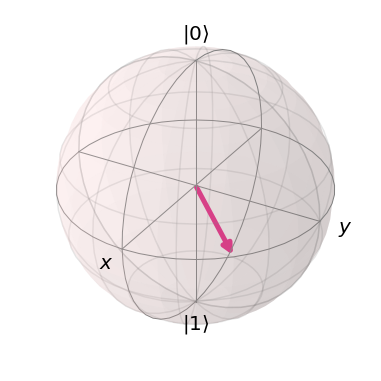

In [733]:
plot_bloch_vector(vec)

The T Gate induces a $\frac{\pi}{4}$ rotation around z. 

**Example**: demonstrating the action of the $T^{\dagger}$ Gate on the qubit in the $|+\rangle$ state. 

In [734]:
qc1 = QuantumCircuit(q)

In [735]:
qc1.h(q[0])
qc1.tdg(q[0])

In [736]:
job = execute(qc1,backend)
res = job.result()

In [737]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[0.707+0.j  0.5  -0.5j]


In [738]:
p = np.outer(vector,vector.conj())

In [739]:
x = float(np.trace(np.dot(px,p)))
y = float(np.trace(np.dot(py,p)))
z = float(np.trace(np.dot(pz,p)))

/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [740]:
vec = [x,y,z]

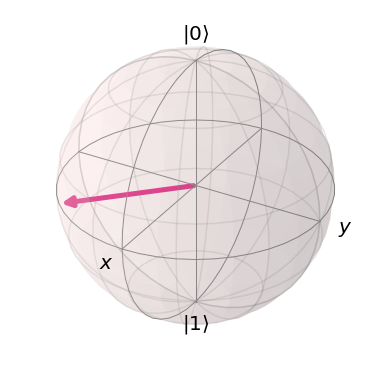

In [741]:
plot_bloch_vector(vec)

The $T^{\dagger}$ Gate induces a $-\frac{\pi}{4}$ rotation around z. 

**Example**: demonstrating the action of the S Gate on the qubit in the $|+\rangle$ state.


In [742]:
qc1 = QuantumCircuit(q)

In [743]:
qc1.h(q[0])
qc1.s(q[0])

In [744]:
job = execute(qc1,backend)
res = job.result()

In [745]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[0.707+0.j    0.   +0.707j]


In [746]:
p = np.outer(vector,vector.conj())

In [747]:
x = float(np.trace(np.dot(px,p)))
y = float(np.trace(np.dot(py,p)))
z = float(np.trace(np.dot(pz,p)))

/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/ianjoeldavid/Documents/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [748]:
vec = [x,y,z]

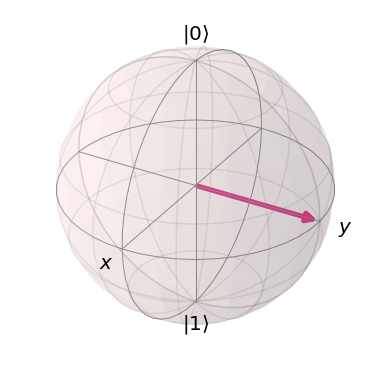

In [749]:
plot_bloch_vector(vec)

The S Gate induces a $\frac{\pi}{2}$ rotation around z. 

**Example**: demonstrating the action of the $S^\dagger$ Gate on the qubit in the $|+\rangle$ state.

The $S^\dagger$ Gate induces a $-\frac{\pi}{2}$ rotation around z. 

**The General Unitary Gate**

In addition to the set of universal gates, Qiskit also provides a general unitary gate.

The general unitary gate, $u_{3}$, allows you to construct any single qubit gate, it has 3 parameters $\theta ,\phi$ and $\lambda$. It has the following matrix representation:

$$u_{3}=\begin{pmatrix}
 \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin{\frac{\theta}{2}}\\
 e^{i\phi}\sin{\frac{\theta}{2}} & e^{i(\lambda + \phi)}\cos{\frac{\theta}{2}}\\
 \end{pmatrix}$$ 




To use this gate we need to specify the 3 parameters in the following order $\theta$ , $\phi$ and $\lambda$ , in radians.

**Example**: using a $u_3$ gate to set the qubit into an arbitrary superposition. 

In [750]:
qc1 = QuantumCircuit(q)

In [751]:
qc1.u3(np.pi/7,5*np.pi/14,np.pi/8,q[0])

**Multi Qubit Gates**

A 2-qubit system can be represented by the following vector:

$$ |\psi\rangle = \alpha_1 |00\rangle + \alpha_2 |01\rangle + \alpha_3 |10\rangle + \alpha_4|11\rangle$$
where $$ |\alpha_1|^2 + |\alpha_2|^2 + |\alpha_3|^2 +|\alpha_4|^2 = 1 $$

Qiskit also has built in multi qubit gates, which act on more than one qubit. The most basic multi qubit gate is the Controlled-Not or CNOT gate. 

$$ CNOT = \begin{pmatrix} 
                    1 & 0 & 0 & 0\\
                    0 & 1 & 0 & 0\\
                    0 & 0 & 0 & 1\\
                    0 & 0 & 1 & 0
                    \end{pmatrix}$$
                    
An equivalent representation of this gate is: 
$$ CNOT = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes X$$


**Example**: using the CNOT gate to construct the Bell Pair.

The Bell Pair is represented using the following vector: 
$$ |\beta\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
= \begin{pmatrix} 
    \frac{1}{\sqrt{2}} \\
    0 \\
    0\\
    \frac{1}{\sqrt{2}} 
\end{pmatrix}$$

This state represents the entanglement of two qubits. 

In [752]:
q = QuantumRegister(2)

qc1 = QuantumCircuit(q)

In [753]:
qc1.h(q[0])
qc1.cx(q[0],q[1])
qc1.draw()

The first parameter of the CNOT function is the control qubit and the second parameter is the target qubit. 

In [754]:
job = execute(qc1,backend)
res = job.result()

In [755]:
vector = res.get_statevector(qc1,decimals=3)
print(vector)

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


In [756]:
pprint(Matrix(vector))

⎡0.707⎤
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎣0.707⎦


**Exercise**: constructing a Bell Pair circuit and executing it using the OpenQasm backend. 


Other controlled gates in qiskit include the controlled-y, controlled-z and controlled-Hadamard gate. 



**Example**: drawing the Controlled-Hadamard Gate 

In [757]:
q = QuantumRegister(2)

qc = QuantumCircuit(q)

In [758]:
qc.ch(q[0],q[1])
qc.draw()

**Example**: drawing the Controlled-Y Gate 

In [759]:
q = QuantumRegister(2)

qc = QuantumCircuit(q)

In [760]:
qc.cy(q[0],q[1])
qc.draw()

**Example**: drawing the Controlled-Z Gate 

In [761]:
q = QuantumRegister(2)

qc = QuantumCircuit(q)

In [762]:
qc.cz(q[0],q[1])
qc.draw()

It is also possible to construct any controlled 2-qubit gate using the controlled-$u_3$ gate. 

**Example**: drawing the Controlled-$u_3$

In [763]:
q = QuantumRegister(2)

qc = QuantumCircuit(q)

In [764]:
qc.cu3(np.pi/3,np.pi/4,np.pi,q[0],q[1])
qc.draw()

The *cu3*() function takes $\theta$, $\phi$, $\lambda$, the controlled qubit and the target qubit as parameters. 

**Example**: constructing the GHZ-state.

The GHZ-state is the entanglement of 3 qubits and can be represented as follows:

$$|\psi\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}$$

$$|\psi\rangle = \begin{pmatrix}
      0.707\\
      0\\
      0\\
      0\\
      0\\
      0\\
      0\\
      0.707
\end{pmatrix}$$

The results can be obtained from the OpenQASM backend.





The results can also be obtained using the state_vector simulator. 